In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [3]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [4]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [5]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [6]:
# 4.1
# Рассчитайте конверсию на каждый день по приведённой формуле. Результат занесите в столбец conversion. 
# Чему была равна конверсия (в процентах) в группе А 5 января 2017 года? Ответ округлите до второго знака после запятой.
daily_data['conversion'] = (daily_data['converted']/daily_data['users_count'])*100
daily_data

,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361
5,2017-01-04,B,6538,763,11.670236
6,2017-01-05,A,6419,791,12.322792
7,2017-01-05,B,6509,743,11.414964
8,2017-01-06,A,6604,762,11.538462
9,2017-01-06,B,6735,834,12.383073


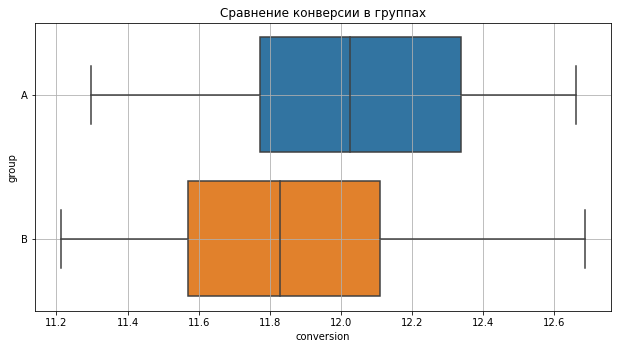

In [7]:
# Давайте построим диаграмму boxplot для сравнения параметров распределения ежедневной конверсии по группам. 
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [8]:
# Давайте вычислим средний и медианный показатель конверсии в контрольной и тестовой группе 
# и умножим результат на 100 (получим результат в процентах):

conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


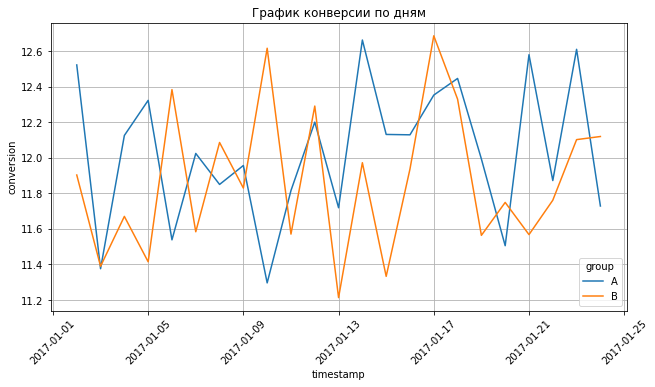

In [9]:
# Итак, давайте применим новые знания к нашим данным и вычислим кумулятивную конверсию, а затем построим её график. 

# Но для начала ради эксперимента посмотрим, как вообще изменялись показатели ежедневной конверсии в каждой группе во времени. 
# Для этого построим линейные графики для каждой группы: по оси абсцисс отложим дату, а по оси ординат — показатель конверсии:

# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

In [10]:
# Выберем данные для группы А и создадим в полученной таблице новый столбец cum_users_count, 
# в который запишем результат работы метода cumsum() по столбцу users_count:

# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

/var/folders/tp/mcxy8wd524b65_m2_4n493dh0000gn/T/ipykernel_55172/2236422246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [11]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


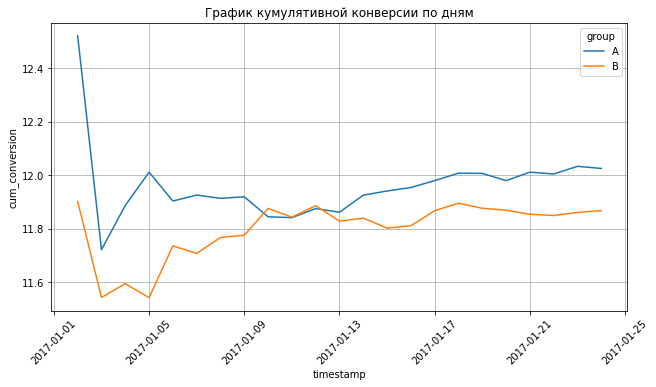

In [12]:
# А теперь построим графики кумулятивной конверсии по дням в каждой группе:

# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [14]:
# 4.6-4.9
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

sample_b

,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B
...,...,...,...,...,...
61378,2020-11-23,9.965675e+08,0,0,B
61379,2020-11-23,9.970803e+07,0,0,B
61380,2020-11-23,9.984814e+08,0,0,B
61381,2020-11-23,9.991118e+08,0,0,B


In [16]:
sample_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61571 entries, 0 to 61570
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          61571 non-null  object 
 1   cid           61571 non-null  float64
 2   transactions  61571 non-null  int64  
 3   revenue       61571 non-null  int64  
 4   group         61571 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


In [23]:
sample = pd.concat([sample_a,sample_b],ignore_index=True, axis=0)
sample

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A
...,...,...,...,...,...
122949,2020-11-23,9.965675e+08,0,0,B
122950,2020-11-23,9.970803e+07,0,0,B
122951,2020-11-23,9.984814e+08,0,0,B
122952,2020-11-23,9.991118e+08,0,0,B


In [32]:
# 4.6
# Постройте таблицу со следующими ежедневными показателями:

# количество посетителей сайта;
# суммарное число транзакций;
# общая сумма покупок (выручка).

# Для этого сгруппируйте данные по признаку date, предварительно преобразовав его к типу datetime.

# Чему равны значения ежедневных показателей в группе А на 8 ноября 2020 года?

sample['date'] = pd.to_datetime(sample['date'])

sample_daily = sample.groupby(['date','group']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid':'users_count'})

sample_daily[sample_daily['date']=='2020-11-08']


,date,group,users_count,transactions,revenue
4,2020-11-08,A,3354,25,846051
5,2020-11-08,B,3291,24,3044842


In [39]:
# 4.7
# Добавьте в каждую из таблиц кумулятивные метрики:

# кумулятивное количество посетителей сайта;
# кумулятивное суммарное число транзакций;
# кумулятивная общая сумма покупок (кумулятивная выручка).
# Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек 
# (кумулятивная выручка/кумулятивное суммарное число транзакций).

# Чему равна средняя кумулятивная конверсия в группах за весь период проведения A/B-теста? 
# Ответ округлите до сотых, знаки процентов не вводите.

sample_daily['cum_users_count'] = sample_daily.groupby(['group'])['users_count'].cumsum()
sample_daily['cum_transactions'] = sample_daily.groupby(['group'])['transactions'].cumsum()
sample_daily['cum_revenue'] = sample_daily.groupby(['group'])['revenue'].cumsum()
sample_daily['cum_conversion'] = (sample_daily['cum_transactions']/sample_daily['cum_users_count'])*100
sample_daily['cum_chek'] = sample_daily['cum_revenue'] / sample_daily['cum_transactions']
sample_daily.groupby(['group'])['cum_conversion'].mean()

group
A    0.712755
B    0.762178
Name: cum_conversion, dtype: float64

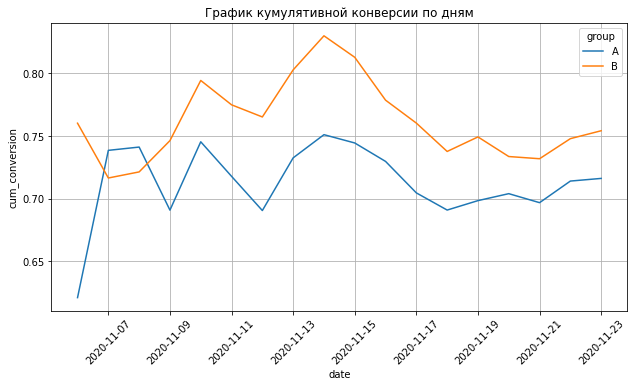

In [40]:
# 4.8
# Постройте графики кумулятивной конверсии в каждой группе. Какие выводы по ним вы можете сделать?

fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])

sns.lineplot(
    x='date',
    y='cum_conversion',
    data=sample_daily,
    hue = 'group',
    ax = ax
)
ax.set_title('График кумулятивной конверсии по дням')
ax.xaxis.set_tick_params(rotation = 45)
ax.grid(True)


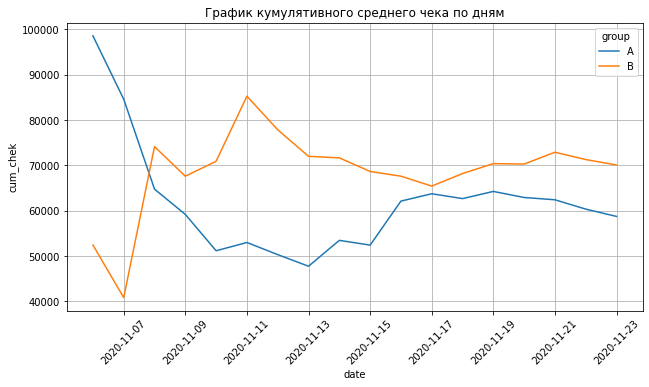

In [41]:
# 4.9
# Постройте графики кумулятивного среднего чека в каждой группе. Какие выводы по ним вы можете сделать?

fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([1,1,1,1])

sns.lineplot(
    x='date',
    y='cum_chek',
    data=sample_daily,
    hue = 'group',
    ax = ax
)
ax.set_title('График кумулятивного среднего чека по дням')
ax.xaxis.set_tick_params(rotation = 45)
ax.grid(True)

In [59]:
ab_data

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1
...,...,...,...,...
290477,751197,2017-01-03,A,0
290478,945152,2017-01-12,A,0
290479,734608,2017-01-22,A,0
290480,697314,2017-01-15,A,0


In [43]:
from statsmodels.stats.proportion import proportions_ztest

# Итак, сгруппируем данные по признаку группы и рассчитаем количество «успехов» (сумма по столбцу converted) 
# и общее количество наблюдений (количество непустых значений в столбце converted) для каждой группы.
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)
display(converted_piv)

,sum,count
group,,
A,17467,145241
B,17238,145241


In [48]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.1
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [49]:
time_data = pd.read_excel('data/time_data.xlsx')
display(time_data.head())

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


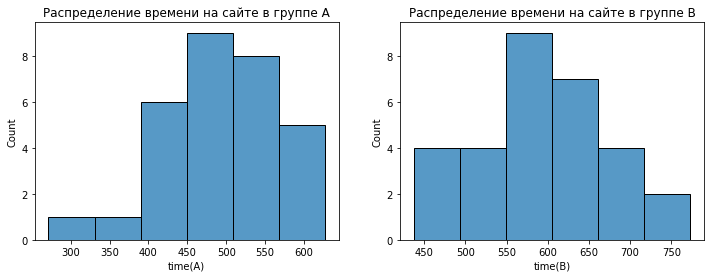

In [50]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

In [51]:
# Гистограммы напоминают нормальное распределение. 
# Давайте проверим гипотезу о нормальности обоих распределений с помощью критерия Шапиро-Уилка. 
# Для этого используем функцию shapiro() из модуля scipy.stats:

from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


In [52]:
from scipy.stats import ttest_ind
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'], 
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

p-value: 0.0
Отвергаем нулевую гипотезу. Среднее время в группах одинаково
Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B


In [62]:
# 5.2
# Проверьте гипотезу о равенстве конверсий в группах А и B при альтернативной гипотезе: 
# Конверсия в группе А меньше, чем конверсия в группе B. 
# Используйте функцию proportions_ztest() из модуля statsmodels.stats.proportion. В качестве уровня значимости возьмите 0.1.

converted_sample= sample_daily.groupby('group')[['users_count', 'transactions']].sum()

# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А меньше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_sample['transactions'], #число "успехов"
    nobs=converted_sample['users_count'], #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.22
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [68]:
sample_daily[sample_daily['group']=='A']['cum_chek']

0     98579.937500
2     84593.974359
4     64769.000000
6     59195.682927
8     51180.450450
10    53005.276923
12    50325.671141
14    47769.410811
16    53472.641860
18    52423.917355
20    62133.683824
22    63753.088737
24    62680.370607
26    64264.666667
28    62927.736264
30    62422.424084
32    60363.354217
34    58750.716553
Name: cum_chek, dtype: float64

In [69]:
# 5.3
# Проверьте гипотезу о нормальности распределений ежедневного среднего чека с помощью критерия Шапиро-Уилка. 
# В качестве уровня значимости возьмите 0.1.

from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(sample_daily[sample_daily['group']=='A']['cum_chek'])
shapiro_result_b = shapiro(sample_daily[sample_daily['group']=='B']['cum_chek'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


In [72]:
# 5.4
# Проверьте гипотезу о равенстве ежедневных средних чеков с помощью критерия Манна-Уитни при альтернативной гипотезе: 
# Ежедневный средний чек в группе А меньше, чем в группе B. 
# Используйте функцию mannwhitneyu() из модуля scipy.stats. 
# В качестве уровня значимости возьмите 0.1.

from scipy.stats import mannwhitneyu

# нулевая и альтернативная гипотезы
H0 = 'Средний чек в группах одинаковый'
H1 = 'Средний чек в группе А меньше, чем в группе B'
alpha = 0.1 #уровень значимости
#вычисляем результат критерия Манна-Уитни для выборок
results = mannwhitneyu(
    x=sample_daily[sample_daily['group']=='A']['cum_chek'],
    y=sample_daily[sample_daily['group']=='B']['cum_chek'],
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

p-value: 0.0
Отвергаем нулевую гипотезу. Средний чек в группах одинаковый
Альтернативная гипотеза. H1: Средний чек в группе А меньше, чем в группе B


In [73]:
n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [74]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z критическое

In [75]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат
 
 
 
# Доверительный интервал: (12180, 20020)

Доверительный интервал: (12180, 20020)


In [80]:
# 6.5
# Аккумуляторный завод производит батарейки, срок службы которых имеет истинное стандартное отклонение в 2.4 месяца. 
# Средний срок службы батареек в случайной выборке из 64 штук составил 12.35 месяца. 
# Необходимо построить 90 %-ный доверительный интервал для истинного среднего срока службы производимой батарейки 
# и ответить на вопросы заданий ниже.

n = 64 # размер выборки
x_mean = 12.35 # выборочное среднее
sigma = 2.4 # истинное стандартное отклонение
gamma = 0.90 # уровень надёжности
alpha = 1 - gamma # уровень значимости

z_crit = -norm.ppf(alpha/2) # z критическое
z_crit = round(z_crit,2)

eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound,2), round(upper_bound,2)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат
# Доверительный интервал: (12180, 20020)

print (f'z= {z_crit}')

Доверительный интервал: (11.86, 12.84)
z= 1.64


In [81]:
# Управляющий супермаркета хочет оценить, сколько денег покупатели тратят за один поход в супермаркет в среднем. 
# На основании ранее собранных данных известно, что расходы одного покупателя распределены приблизительно нормально. 
# Управляющий взял случайную выборку из 15 покупателей и выяснил, что их средние расходы равны 2 000 рублей, 
# а выборочное стандартное отклонение равно 400 рублей.

n = 15 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [82]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое

In [83]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат
 
 
# Доверительный интервал: (1778, 2222)

Доверительный интервал: (1778, 2222)


In [84]:
# 6.6
# Чиновника интересует сумма подоходного налога, выплачиваемого домохозяйствами за год. 
# На случайной выборке из 25 домохозяйств был посчитан средний размер выплаченного налога, и он составил $ 3 540. 
# Также известно выборочное отклонение величины подоходного налога, равное $ 1 150.

n = 25 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 3540 # выборочное среднее
x_std = 1150 # выборочное стандартное отклонение
gamma = 0.90 # уровень надёжности
alpha = 1 - gamma # уровень значимости

t_crit = -t.ppf(alpha/2, k) # t-критическое

eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (3146, 3934)


In [85]:
ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [86]:
#фильтруем данные группы А
a_data = ab_data[ab_data['group'] == 'A']
#фильтруем данные группы B
b_data = ab_data[ab_data['group'] == 'B']

In [87]:
# Давайте на этот раз оформим расчёт в виде функции: объявим функцию proportions_conf_interval(). 
# У данной функции будет три аргумента: 
# n — размер выборки, 
# x_p — выборочная пропорция 
# и gamma — уровень надёжности (по умолчанию он равен 0.95). 
# 
# Функция будет возвращать кортеж из вычисленных границ доверительного интервала, 
# умноженных на 100 % и округлённых до второго знака после запятой.

def proportions_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

In [88]:
conf_interval_a = proportions_conf_interval(
n=a_data['user_id'].count(), # размер выборки
x_p=a_data['converted'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
n=b_data['user_id'].count(), # размер выборки
x_p=b_data['converted'].mean() # выборочная пропорция
)
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))
# Доверительный интервал для конверсии группы А: (11.86, 12.19)
# Доверительный интервал для конверсии группы B: (11.7, 12.03)

Доверительный интервал для конверсии группы А: (11.86, 12.19)
Доверительный интервал для конверсии группы B: (11.7, 12.03)


In [89]:
#  Создадим функцию diff_proportions_conf_interval() со следующими аргументами: 
# n — список из размеров выборки для групп А и B соответственно, 
# xp — список из выборочных пропорций для групп А и B соответственно 
# и gamma — уровень надёжности (по умолчанию он равен 0.95). 
# 
# Функция будет возвращать кортеж из вычисленных границ доверительного интервала разницы конверсий, 
# умноженных на 100 % и округлённых до второго знака после запятой.

def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [90]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['converted'].mean(), b_data['converted'].mean()]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))
 
# Доверительный интервал для разности конверсий: (-0.39, 0.08)

Доверительный интервал для разности конверсий: (-0.39, 0.08)


In [95]:
# 6.9
# Чтобы оценить удовлетворённость клиентов сети отелей, менеджер взял случайную выборку из 189 комментариев, 
# оставленных посетителями на онлайн-платформе по бронированию, и провёл анализ их содержания. 
# Выяснилось, что 132 комментария были положительными, остальные — негативными.

# Чему равна выборочная пропорция положительных комментариев? Укажите с точностью до трёх знаков после разделительной точки.
n = 189
x = 132
x_p = x/n

print(x_p)

# Найдите 90 % доверительный интервал для истинной пропорции положительных комментариев. 
# Ответ приведите в процентах и округлите до двух знаков после запятой. При расчёте используйте z-критическое.

conf_interval = proportions_conf_interval(
n, # размер выборки
x_p, # выборочная пропорция
gamma = 0.9
)

print(conf_interval)

0.6984126984126984
(64.35, 75.33)


In [96]:
# 6.10
# Проводится A/B-тестирование вариантов отображения страницы корзины на сайте интернет-магазина. 
# Есть два варианта отображения страницы: 
# с товарными рекомендациями «Хиты продаж» 
# и персональными, подобранными под интерес конкретно этого пользователя. 
# 
# Метрикой является конверсия действия «добавить в корзину товар из рекомендаций». Были собраны следующие данные:

# Группа
# Число добавленных в корзину товаров
# Размер выборки
# А (Персональные скидки)
# 45
# 1000
# B (Хиты продаж)
# 50
# 1000

# Постройте 95 %-ый доверительный интервал разности полученных конверсий. 
# Ответ приведите в процентах и округлите границы интервала до второго знака после запятой. При расчёте используйте z-критическое.


a = 45/1000
b = 50/1000
# размеры выборок групп А и B
n = [1000, 1000]
# выборочная пропорция групп A и B
xp = [a, b]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))
 
# Доверительный интервал для разности конверсий: (-0.39, 0.08)



Доверительный интервал для разности конверсий: (-1.36, 2.36)
